In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# see all columns at once with scrolling
pd.set_option('display.max_columns', 0)

In [117]:
owid = pd.read_csv('./owid-covid-data.csv')
owid['Country'] = owid['location']
eu_temp = owid.loc[owid.continent == "Europe",['Country','date','positive_rate','reproduction_rate']]
eu_temp['po
eu_temp['positive_rate_after_60'] = eu_temp.groupby('Country')['positive_rate'].shift(-60)
eu_temp['positive_rate_after_30'] = eu_temp.groupby('Country')['positive_rate'].shift(-30)sitive_rate_after_14'] = eu_temp.groupby('Country')['positive_rate'].shift(-14)
eu_temp['reproduction_rate_1'] = eu_temp.groupby('Country')['reproduction_rate'].shift(-1)
eu_temp['reproduction_rate_2'] = eu_temp.groupby('Country')['reproduction_rate'].shift(-2)
eu_temp['reproduction_rate_3'] = eu_temp.groupby('Country')['reproduction_rate'].shift(-3)
eu_temp['reproduction_rate_4'] = eu_temp.groupby('Country')['reproduction_rate'].shift(-4)
eu_temp['reproduction_rate_5'] = eu_temp.groupby('Country')['reproduction_rate'].shift(-5)
eu_temp['reproduction_rate_6'] = eu_temp.groupby('Country')['reproduction_rate'].shift(-6)
eu_temp['reproduction_rate_7'] = eu_temp.groupby('Country')['reproduction_rate'].shift(-7)

eu_response =pd.read_csv('./country_response_measures.csv')
eu_response['date'] = eu_response['date_start']
del eu_response['date_start']
eu_response = eu_response.merge(eu_temp,on=['Country','date'],how='outer')
del eu_temp
eu_response = eu_response[['Country','date','Response_measure','date_end','positive_rate','positive_rate_after_14''positive_rate_after_60','positive_rate_after_30',,'reproduction_rate','reproduction_rate_1','reproduction_rate_2','reproduction_rate_3','reproduction_rate_4','reproduction_rate_5','reproduction_rate_6','reproduction_rate_7']]

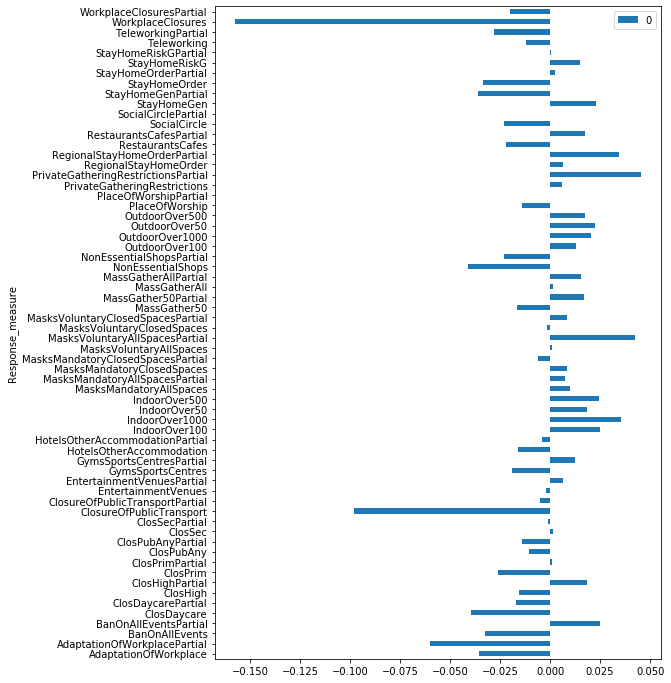

In [120]:
# Difference between mean positive_rate on start date and 30 days after start
pd.DataFrame(eu_response.groupby("Response_measure").mean()["positive_rate_after_30"] - eu_response.groupby("Response_measure").mean()["positive_rate"]).plot.barh(figsize=(8,12))

## End - Start reproduction rates

In [121]:
eu_temp = owid.loc[owid.continent == "Europe",['Country','date','positive_rate','reproduction_rate']]
eu_response_with_end = pd.merge(eu_response,eu_temp, left_on=["Country", "date_end"], right_on=["Country", "date"])
eu_response_with_end
del eu_temp
eu_response_with_end = eu_response_with_end.rename(columns = {"reproduction_rate_x": "reproduction_rate_start", "reproduction_rate_y": "reproduction_rate_end", "positive_rate_y": "positive_rate_end", "positive_rate_x": "positive_rate_start"})
del eu_response_with_end["date_y"]

Text(0.5, 1.0, 'Change in mean reproduction rate between start and end date of measures')

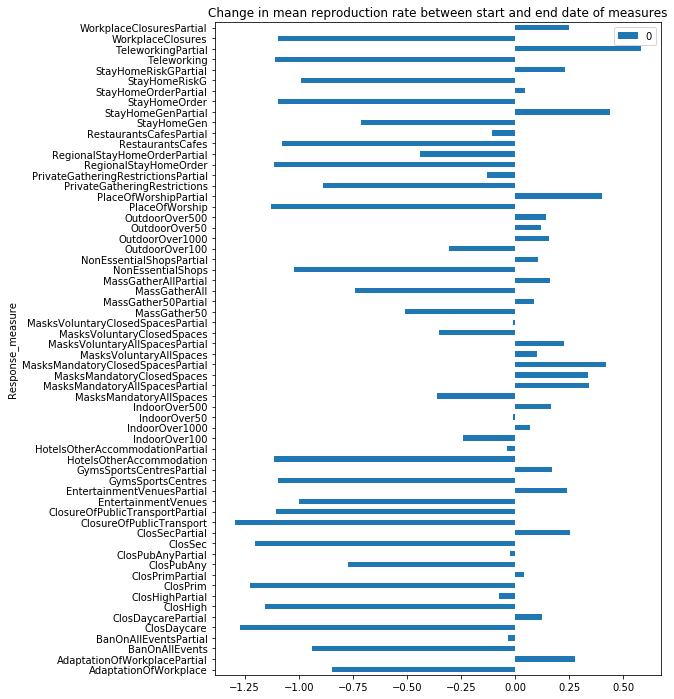

In [123]:
# Difference between mean reproduction rate on start date and end date
pd.DataFrame(
    eu_response_with_end.groupby("Response_measure").mean()["reproduction_rate_end"] - eu_response_with_end.groupby("Response_measure").mean()["reproduction_rate_start"]
    ).plot.barh(figsize=(8,12))
plt.title("Change in mean reproduction rate between start and end date of measures")